In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x1_train = np.load('files/train_vectors/train_anger_vecs2.npy')
x1_dev = np.load('files/dev_vectors/dev_anger_vecs2.npy')
x1_test = np.load('files/test_vectors/test_anger_vecs2.npy')

y1_train = np.load('files/gold_label_vectors/train/anger.npy')
y1_dev = np.load('files/gold_label_vectors/dev/anger.npy')
y1_test = np.load('files/gold_label_vectors/test/anger.npy')



In [3]:
x2_train = np.load('files/train_vectors/train_fear_vecs2.npy')
x2_dev = np.load('files/dev_vectors/dev_fear_vecs2.npy')
x2_test = np.load('files/test_vectors/test_fear_vecs2.npy')

y2_train = np.load('files/gold_label_vectors/train/fear.npy')
y2_dev = np.load('files/gold_label_vectors/dev/fear.npy')
y2_test = np.load('files/gold_label_vectors/test/fear.npy')

In [4]:
x3_train = np.load('files/train_vectors/train_sadness_vecs2.npy')
x3_dev = np.load('files/dev_vectors/dev_sadness_vecs2.npy')
x3_test = np.load('files/test_vectors/test_sadness_vecs2.npy')

y3_train = np.load('files/gold_label_vectors/train/sadness.npy')
y3_dev = np.load('files/gold_label_vectors/dev/sadness.npy')
y3_test = np.load('files/gold_label_vectors/test/sadness.npy')

In [5]:
x4_train = np.load('files/train_vectors/train_joy_vecs2.npy')
x4_dev = np.load('files/dev_vectors/dev_joy_vecs2.npy')
x4_test = np.load('files/test_vectors/test_joy_vecs2.npy')

y4_train = np.load('files/gold_label_vectors/train/joy.npy')
y4_dev = np.load('files/gold_label_vectors/dev/joy.npy')
y4_test = np.load('files/gold_label_vectors/test/joy.npy')

In [6]:
X_train = np.concatenate((x1_train, x2_train, x3_train, x4_train),axis=0)
X_dev = np.concatenate((x1_dev, x2_dev, x3_dev, x4_dev),axis=0)
X_test = np.concatenate((x1_test, x2_test, x3_test, x4_test),axis=0)

Y_train = np.concatenate((y1_train, y2_train, y3_train, y4_train),axis=0)
Y_dev = np.concatenate((y1_dev, y2_dev, y3_dev, y4_dev),axis=0)
Y_test = np.concatenate((y1_test, y2_test, y3_test, y4_test),axis=0)

In [7]:
x1_train.shape

(857, 180)

In [8]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Concatenate
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import load_model
from keras import Model
from keras.layers.core import Activation

import time

Using TensorFlow backend.


In [9]:
import keras.backend as K
def r2(y_true, y_pred):
    a = K.square(y_pred - y_true)
    b = K.sum(a)
    c = K.mean(y_true)
    d = K.square(y_true - c)
    e = K.sum(d)
    f = 1 - b / e
    return f

In [10]:
def define_model(input_shape,to_file):
    model = Sequential()
    model.add(Dense(256, input_shape=input_shape, activation="relu"))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    # compile network
    model.compile(loss='mse', optimizer='adam', metrics=['mae',r2])
    # summarize defined model
    model.summary()
    plot_model(model, to_file, show_shapes=True)
    return model


In [11]:
# train the model

to_file='model_clean_glove_lexicon_hashtag.png'
model = define_model((x1_train.shape[1],),to_file)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               46336     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 128,641
Trainable params: 128,641
Non-trainable params: 0
_________________________________________________________________


In [12]:

start_time_dl =time.time()

history = model.fit(x1_train, y1_train, epochs = 150, batch_size = 16, verbose = 2, validation_data=(x1_dev,y1_dev))

trainingtime = pd.DataFrame(columns = ["Classifier", "Training Time(Seconds)"])
trainingtime.loc[0] = ["Deep Learning Model_clean_glove_hashta", round((time.time()-start_time_dl), 2)] 


Train on 857 samples, validate on 84 samples
Epoch 1/150
 - 0s - loss: 0.0233 - mae: 0.1210 - r2: 0.1088 - val_loss: 0.0177 - val_mae: 0.1112 - val_r2: 0.2165
Epoch 2/150
 - 0s - loss: 0.0166 - mae: 0.1011 - r2: 0.3504 - val_loss: 0.0161 - val_mae: 0.1043 - val_r2: 0.2491
Epoch 3/150
 - 0s - loss: 0.0138 - mae: 0.0914 - r2: 0.4411 - val_loss: 0.0157 - val_mae: 0.1050 - val_r2: 0.2104
Epoch 4/150
 - 0s - loss: 0.0106 - mae: 0.0808 - r2: 0.5852 - val_loss: 0.0169 - val_mae: 0.1074 - val_r2: 0.1480
Epoch 5/150
 - 0s - loss: 0.0082 - mae: 0.0703 - r2: 0.6686 - val_loss: 0.0227 - val_mae: 0.1191 - val_r2: -1.0572e-01
Epoch 6/150
 - 0s - loss: 0.0069 - mae: 0.0645 - r2: 0.7245 - val_loss: 0.0203 - val_mae: 0.1136 - val_r2: -3.9256e-02
Epoch 7/150
 - 0s - loss: 0.0050 - mae: 0.0558 - r2: 0.7919 - val_loss: 0.0159 - val_mae: 0.1017 - val_r2: 0.1811
Epoch 8/150
 - 0s - loss: 0.0041 - mae: 0.0505 - r2: 0.8291 - val_loss: 0.0194 - val_mae: 0.1113 - val_r2: -2.4095e-03
Epoch 9/150
 - 0s - loss: 0.

Epoch 71/150
 - 0s - loss: 4.8193e-04 - mae: 0.0164 - r2: 0.9790 - val_loss: 0.0162 - val_mae: 0.1028 - val_r2: 0.1709
Epoch 72/150
 - 0s - loss: 5.4661e-04 - mae: 0.0171 - r2: 0.9777 - val_loss: 0.0169 - val_mae: 0.1043 - val_r2: 0.1608
Epoch 73/150
 - 0s - loss: 4.9209e-04 - mae: 0.0163 - r2: 0.9799 - val_loss: 0.0159 - val_mae: 0.1024 - val_r2: 0.1991
Epoch 74/150
 - 0s - loss: 4.0821e-04 - mae: 0.0144 - r2: 0.9822 - val_loss: 0.0157 - val_mae: 0.1010 - val_r2: 0.2067
Epoch 75/150
 - 0s - loss: 3.2974e-04 - mae: 0.0128 - r2: 0.9871 - val_loss: 0.0159 - val_mae: 0.1020 - val_r2: 0.1848
Epoch 76/150
 - 0s - loss: 2.8802e-04 - mae: 0.0123 - r2: 0.9863 - val_loss: 0.0157 - val_mae: 0.1021 - val_r2: 0.2122
Epoch 77/150
 - 0s - loss: 3.1501e-04 - mae: 0.0126 - r2: 0.9878 - val_loss: 0.0157 - val_mae: 0.1023 - val_r2: 0.2109
Epoch 78/150
 - 0s - loss: 2.9162e-04 - mae: 0.0119 - r2: 0.9874 - val_loss: 0.0156 - val_mae: 0.1004 - val_r2: 0.2068
Epoch 79/150
 - 0s - loss: 3.5715e-04 - mae: 0.0

Epoch 140/150
 - 0s - loss: 5.2100e-04 - mae: 0.0162 - r2: 0.9782 - val_loss: 0.0152 - val_mae: 0.0990 - val_r2: 0.2513
Epoch 141/150
 - 0s - loss: 3.8596e-04 - mae: 0.0144 - r2: 0.9837 - val_loss: 0.0154 - val_mae: 0.1003 - val_r2: 0.2316
Epoch 142/150
 - 0s - loss: 2.8660e-04 - mae: 0.0128 - r2: 0.9879 - val_loss: 0.0157 - val_mae: 0.1018 - val_r2: 0.2079
Epoch 143/150
 - 0s - loss: 1.7792e-04 - mae: 0.0102 - r2: 0.9927 - val_loss: 0.0159 - val_mae: 0.1018 - val_r2: 0.2113
Epoch 144/150
 - 0s - loss: 9.3353e-05 - mae: 0.0071 - r2: 0.9961 - val_loss: 0.0155 - val_mae: 0.1011 - val_r2: 0.2250
Epoch 145/150
 - 0s - loss: 5.8081e-05 - mae: 0.0055 - r2: 0.9977 - val_loss: 0.0155 - val_mae: 0.1007 - val_r2: 0.2276
Epoch 146/150
 - 0s - loss: 3.8508e-05 - mae: 0.0043 - r2: 0.9984 - val_loss: 0.0156 - val_mae: 0.1009 - val_r2: 0.2231
Epoch 147/150
 - 0s - loss: 3.3502e-05 - mae: 0.0039 - r2: 0.9986 - val_loss: 0.0157 - val_mae: 0.1017 - val_r2: 0.2162
Epoch 148/150
 - 0s - loss: 3.1278e-05 -

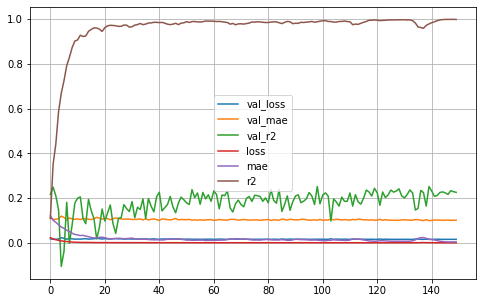

In [13]:
# show the learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

def evaluate_model(X,y):
    _, acc = model.evaluate(X, y, verbose = 0)
    return acc

In [14]:
from sklearn.metrics import r2_score
def evaluate_model(X,y):
    pred_y = model.predict(X)
    acc = r2_score(y, pred_y)
    return acc

In [15]:
# evaluate the DL model

# load the model
# model = load_model('model_clean_glove_hashtag.h5')

# evaluate model on training dataset
print('Train Accuracy: %0.2f%%' % (evaluate_model(x1_train, y1_train)*100))
print('Valid Accuracy: %0.2f%%' % (evaluate_model(x1_dev, y1_dev)*100))

acc_dl = evaluate_model(x1_test, y1_test) * 100
print('Test Accuracy: %0.2f%%' % acc_dl)
testing_acc = pd.DataFrame(columns = ["Classifier", "Testing accuracy(percent)"])
testing_acc.loc[0] = ["Deep Learning Model_clean_glove_hashtag", acc_dl]  

Train Accuracy: 99.86%
Valid Accuracy: 36.49%
Test Accuracy: 31.28%


In [16]:
# do a sanity check
model.predict(np.array([x1_train[2]]))[0]

array([0.90054363], dtype=float32)

In [20]:
# train the model

to_file='model_clean_glove_lexicon_hashtag.png'
model = define_model((x1_train.shape[1],),to_file)

start_time_dl =time.time()

history = model.fit(X_train,Y_train,epochs = 150, batch_size = 16, verbose = 2,validation_data=(X_dev,Y_dev))

trainingtime = pd.DataFrame(columns = ["Classifier", "Training Time(Seconds)"])
trainingtime.loc[0] = ["Deep Learning Model_clean_glove_hashta", round((time.time()-start_time_dl), 2)] 



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               46336     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 128,641
Trainable params: 128,641
Non-trainable params: 0
_________________________________________________________________
Train on 3613 samples, validate on 347 samples
Epoch 1/150
 - 0s - loss: 0.0317 - mae: 0.1438 - r2: 0.0585 - val_l

Epoch 61/150
 - 0s - loss: 7.0781e-04 - mae: 0.0189 - r2: 0.9773 - val_loss: 0.0304 - val_mae: 0.1346 - val_r2: -1.4137e-02
Epoch 62/150
 - 0s - loss: 6.9856e-04 - mae: 0.0186 - r2: 0.9776 - val_loss: 0.0308 - val_mae: 0.1345 - val_r2: -4.7485e-02
Epoch 63/150
 - 0s - loss: 7.0575e-04 - mae: 0.0188 - r2: 0.9772 - val_loss: 0.0317 - val_mae: 0.1361 - val_r2: -7.2745e-02
Epoch 64/150
 - 0s - loss: 7.0173e-04 - mae: 0.0188 - r2: 0.9780 - val_loss: 0.0313 - val_mae: 0.1359 - val_r2: -3.4443e-02
Epoch 65/150
 - 0s - loss: 6.8541e-04 - mae: 0.0185 - r2: 0.9785 - val_loss: 0.0313 - val_mae: 0.1354 - val_r2: -5.3526e-02
Epoch 66/150
 - 0s - loss: 7.4556e-04 - mae: 0.0194 - r2: 0.9759 - val_loss: 0.0314 - val_mae: 0.1366 - val_r2: -5.1625e-02
Epoch 67/150
 - 0s - loss: 7.7803e-04 - mae: 0.0202 - r2: 0.9740 - val_loss: 0.0308 - val_mae: 0.1345 - val_r2: -6.5367e-02
Epoch 68/150
 - 0s - loss: 8.4952e-04 - mae: 0.0208 - r2: 0.9708 - val_loss: 0.0320 - val_mae: 0.1380 - val_r2: -8.3987e-02
Epoch 69

Epoch 127/150
 - 0s - loss: 3.3140e-04 - mae: 0.0111 - r2: 0.9888 - val_loss: 0.0302 - val_mae: 0.1334 - val_r2: 0.0074
Epoch 128/150
 - 0s - loss: 2.6456e-04 - mae: 0.0088 - r2: 0.9907 - val_loss: 0.0305 - val_mae: 0.1345 - val_r2: -5.1526e-04
Epoch 129/150
 - 0s - loss: 2.4950e-04 - mae: 0.0081 - r2: 0.9916 - val_loss: 0.0306 - val_mae: 0.1341 - val_r2: -3.6850e-03
Epoch 130/150
 - 0s - loss: 2.4209e-04 - mae: 0.0078 - r2: 0.9921 - val_loss: 0.0310 - val_mae: 0.1356 - val_r2: -2.5575e-02
Epoch 131/150
 - 0s - loss: 2.6256e-04 - mae: 0.0086 - r2: 0.9917 - val_loss: 0.0311 - val_mae: 0.1350 - val_r2: -2.5765e-02
Epoch 132/150
 - 0s - loss: 2.9255e-04 - mae: 0.0096 - r2: 0.9903 - val_loss: 0.0305 - val_mae: 0.1339 - val_r2: -4.9609e-03
Epoch 133/150
 - 0s - loss: 3.3341e-04 - mae: 0.0110 - r2: 0.9890 - val_loss: 0.0304 - val_mae: 0.1350 - val_r2: -2.8154e-03
Epoch 134/150
 - 0s - loss: 3.8385e-04 - mae: 0.0127 - r2: 0.9873 - val_loss: 0.0310 - val_mae: 0.1353 - val_r2: -2.5354e-02
Epoch

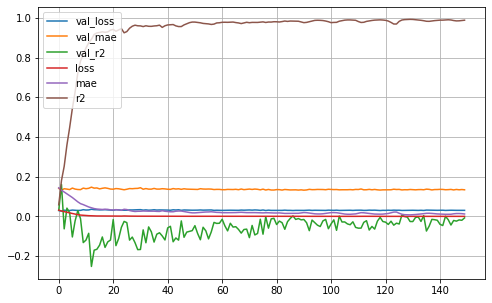

In [21]:
# show the learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [22]:
# evaluate the DL model

# load the model
# model = load_model('model_clean_glove_hashtag.h5')

# evaluate model on training dataset
print('Train Accuracy: %0.2f%%' % (evaluate_model(X_train, Y_train)*100))
print('Valid Accuracy: %0.2f%%' % (evaluate_model(X_dev,Y_dev)*100))

acc_dl = evaluate_model(X_test,Y_test) * 100
print('Test Accuracy: %0.2f%%' % acc_dl)
testing_acc = pd.DataFrame(columns = ["Classifier", "Testing accuracy(percent)"])
testing_acc.loc[0] = ["Deep Learning Model_clean_glove_lexicon_hashtag", acc_dl]  

Train Accuracy: 99.04%
Valid Accuracy: 10.67%
Test Accuracy: 8.98%
